<a href="https://colab.research.google.com/github/sashahexe/Masterthesis-template-NAWI-Graz/blob/master/heavyside_num_time_15000limit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/lululxvi/deepxde.git

Cloning into 'deepxde'...
remote: Enumerating objects: 4297, done.
remote: Counting objects: 100% (1429/1429), done.
remote: Compressing objects: 100% (620/620), done.
remote: Total 4297 (delta 899), reused 1118 (delta 793), pack-reused 2868
Receiving objects: 100% (4297/4297), 1.95 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (3065/3065), done.


In [3]:
%cd deepxde


/content/deepxde


In [4]:
!git pull origin master

From https://github.com/lululxvi/deepxde
 * branch            master     -> FETCH_HEAD
Already up to date.


In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 101 kB 3.8 MB/s 


In [6]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating DeepXDE.egg-info
writing DeepXDE.egg-info/PKG-INFO
writing dependency_links to DeepXDE.egg-info/dependency_links.txt
writing requirements to DeepXDE.egg-info/requires.txt
writing top-level names to DeepXDE.egg-info/top_level.txt
writing manifest file 'DeepXDE.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'DeepXDE.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/deepxde
copying deepxde/callbacks.py -> build/lib/deepxde
copying deepxde/losses.py -> build/lib/deepxde
copying deepxde/gradients.py -> build/

In [7]:
import deepxde

Deepxde backend not selected or invalid. Assuming tensorflow.compat.v1 for now.
Using backend: tensorflow.compat.v1



Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDEBACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch (all lowercase)
Instructions for updating:
non-resource variables are not supported in the long term



In [18]:
%cd deepxde/

[Errno 2] No such file or directory: 'deepxde/'
/content/deepxde/deepxde/optimizers


In [11]:
%cd optimizers/

/content/deepxde/deepxde/optimizers


In [17]:
%pycat config.py

In [25]:
!rm config.py

In [26]:
%%writefile config.py

__all__ = ["set_LBFGS_options"]


from ..backend import backend_name


LBFGS_options = {}


def set_LBFGS_options(
    maxcor=100,
    ftol=1.25e-12,
    gtol=1e-9,
    maxiter=250000,
    maxfun=None,
    maxls=50,
):
    """Sets the hyperparameters of L-BFGS.

    The L-BFGS optimizer used in each backend:

    - TensorFlow 1.x: `scipy.optimize.minimize <https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html#optimize-minimize-lbfgsb>`_
    - TensorFlow 2.x: `tfp.optimizer.lbfgs_minimize <https://www.tensorflow.org/probability/api_docs/python/tfp/optimizer/lbfgs_minimize>`_
    - PyTorch: `torch.optim.LBFGS <https://pytorch.org/docs/stable/generated/torch.optim.LBFGS.html>`_

    I find empirically that torch.optim.LBFGS and scipy.optimize.minimize are better than
    tfp.optimizer.lbfgs_minimize in terms of the final loss value.

    Args:
        maxcor (int): `maxcor` (scipy), `num_correction_pairs` (tfp), `history_size` (torch).
            The maximum number of variable metric corrections used to define the limited
            memory matrix. (The limited memory BFGS method does not store the full
            hessian but uses this many terms in an approximation to it.)
        ftol (float): `ftol` (scipy), `f_relative_tolerance` (tfp), `tolerance_change` (torch).
            The iteration stops when `(f^k - f^{k+1})/max{|f^k|,|f^{k+1}|,1} <= ftol`.
        gtol (float): `gtol` (scipy), `tolerance` (tfp), `tolerance_grad` (torch).
            The iteration will stop when `max{|proj g_i | i = 1, ..., n} <= gtol` where
            `pg_i` is the i-th component of the projected gradient.
        maxiter (int): `maxiter` (scipy), `max_iterations` (tfp), `max_iter` (torch).
            Maximum number of iterations.
        maxfun (int): `maxfun` (scipy), `max_eval` (torch).
            Maximum number of function evaluations. If ``None``, `maxiter` * 1.25.
        maxls (int): `maxls` (scipy), `max_line_search_iterations` (tfp).
            Maximum number of line search steps (per iteration).
    """
    global LBFGS_options
    LBFGS_options["maxcor"] = maxcor
    LBFGS_options["ftol"] = ftol
    LBFGS_options["gtol"] = gtol
    LBFGS_options["maxiter"] = maxiter
    LBFGS_options["maxfun"] = maxfun if maxfun is not None else int(maxiter * 1.25)
    LBFGS_options["maxls"] = maxls


set_LBFGS_options()


# Backend-dependent options
if backend_name == "pytorch":
    # number of iterations per optimization call
    LBFGS_options["iter_per_step"] = min(1000, LBFGS_options["maxiter"])
    LBFGS_options["fun_per_step"] = (
        LBFGS_options["maxfun"]
        * LBFGS_options["iter_per_step"]
        // LBFGS_options["maxiter"]
    )

Writing config.py


Compiling model...
Building feed-forward neural network...
'build' took 0.096422 s



/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 1.727609 s

Initializing variables...
Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [4.30e-03, 5.21e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 4.25e-01, 4.20e-01]    [3.70e-03, 6.49e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 4.25e-01, 4.20e-01]    []  
1000      [3.89e-03, 6.46e-03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 6.14e-03, 2.15e-02]    [1.84e-04, 5.03e-04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 6.14e-03, 2.15e-02]    []  
2000      [3.12e-03, 6.15e-03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 7.10e-03, 1.50e-02]    [3.02e-04, 6.79e-04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 7.10e-03, 1.50e-02]    []  
3000      [6.40e-04, 1.75e-03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.22e-02, 2.50e-03]    [4.03e-04, 1.73e-03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.22e-02, 2.50e-03]    []  
4000  

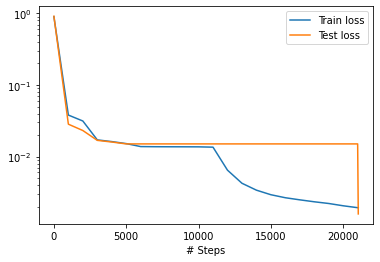

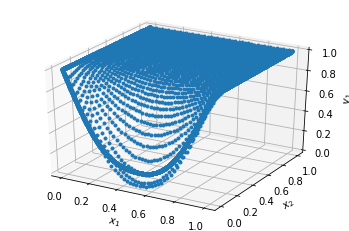

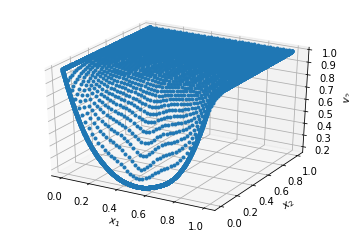

In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 29 22:03:29 2021

@author: sasha
"""


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import deepxde as dde
from deepxde.backend import tf

import math as m
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from deepxde.callbacks import EarlyStopping




def main():
    k = float(0.0078) #sorption uptake rate, 1/s
    D_0 = float(2e-7) #Diffusion coefficient through pores, m^2/s
    alpha = float(100.0) # dimensioneless ratio q_sat/c_sat
#   c_sat = float(7.14) #mol/m^3 saturation concentration in gas phase
#   q_sat = alpha*c_sat #mol/m^3 saturation concentration in solid phase
    L_0 = float(2000.0e-6) #length, m / thickness of paper
    epsilon = float(0.5) #porosity
    num_time = 1000 #time given for the diffusion, s    
#   beta = 0.001
    gamma = num_time * D_0 / (alpha*L_0**2)
    
    

#parameters for dim.less equations

    time = 1 #dim.less time 
    #real time is num_time*time [s]
    
    L = 1 #dim.less length - l/L_0
    #real length is L_0 [m]

#define the PDEs system

    def pde(x, y):
        c, q = y[:, 0:1], y[:, 1:2] #have to be >= 0. These are dim.less concentrations
        
        #real concentrations are c*c_sat and q*q_sat [mol/m^3]
        
        dc_t = dde.grad.jacobian(y, x, i=0, j=1)
        dc_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
        dq_t = dde.grad.jacobian(y, x, i=1, j=1)
 #      dq_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
        eq_a = (1/alpha)*dc_t - gamma * dc_xx + ((1-epsilon)/epsilon) * dq_t 
        eq_b = dq_t - num_time * k * (1 - q) / (1 + tf.exp(-60.0*c))
        return [eq_a, eq_b]

#functions for initial 
    
    def fun_init(x):
        return np.exp(-5 * x[:, 0:1])+np.exp(-5 *(1 - x[:, 0:1]))

#functions to define which points belong to boundaries

    def boundary_left(x, on_boundary):
        return on_boundary and np.isclose(x[0], 0)

    def boundary_right(x, on_boundary):
        return on_boundary and np.isclose(x[0], L)
    
#    def boundary_middle(x, on_boundary):
#        return on_boundary and np.isclose(x[0], L/2)
    
#setting up the geometry and the time  

    geom = dde.geometry.Interval(0, L)
    timedomain = dde.geometry.TimeDomain(0, time)
    geomtime = dde.geometry.GeometryXTime(geom, timedomain)

#define boundary conditions 


    bc_a_left = dde.DirichletBC(
        geomtime, lambda x: 1, boundary_left, component=0
    )
    
    
    bc_a_right = dde.DirichletBC(
        geomtime, lambda x: 1, boundary_right, component=0
    )
    

    bc_b_left = dde.DirichletBC(
        geomtime, lambda x: 1, boundary_left, component=1
    )
    
    bc_b_right = dde.DirichletBC(
        geomtime, lambda x: 1, boundary_right, component=1
    )
    
#    bc_a_middle = dde.NeumannBC(geomtime, lambda x: 0, boundary_middle, component=0)

#    bc_b_middle = dde.NeumannBC(geomtime, lambda x: 0, boundary_middle, component=1)
    
#define initial conditions   
    
    ic1 = dde.IC(geomtime, fun_init, lambda _, on_initial: on_initial, component=0)
    ic2 = dde.IC(geomtime, fun_init, lambda _, on_initial: on_initial, component=1)

   # observe_x, Ca, Cb = gen_traindata()
   # observe_y1 = dde.PointSetBC(observe_x, Ca, component=0)
   # observe_y2 = dde.PointSetBC(observe_x, Cb, component=1)

#put all together into a data container to feed the network afterwards

    data = dde.data.TimePDE(
        geomtime,
        pde,
        [bc_a_left, bc_a_right, bc_b_left, bc_b_right, ic1, ic2],
        num_domain=10000,
        num_boundary=1000,
        num_initial=1000,
      #  anchors=observe_x,
        num_test=2000,

    )
    
      
    
    
    
#define the network    


#hard constraints for BC

    def modify_output(X, y):
        x, t = X[:, 0:1], X[:, 1:2]
        c = y[:, 0:1]
        c_new = x*(1.-x)*c + 1.
        q = y[:, 1:2]
        q_new = x*(1.-x)*q + 1.
        
        return tf.concat([c_new, q_new], axis=1)

#    def modify_output(X, y):
#         x, t = X[:, 0:1], X[:, 1:2]
#         c = y[:, 0:1]
#         c_new = t*x*(1.-x)*c + (tf.exp(-20*x)+tf.exp(-20*(1-x)))
#         q = y[:, 1:2]
#         q_new = t*x*(1.-x)*q + (tf.exp(-20*x)+tf.exp(-20*(1-x)))

#         return tf.concat([c_new, q_new], axis=1)


#define the network    
#    dde.optimizers.set_LBFGS_options(gtol=1e-09)

    net = dde.maps.FNN([2] + [30] * 5 + [2], "tanh", "Glorot uniform")  
   
    net.apply_output_transform(modify_output)                                                             
                                                      

    model = dde.Model(data, net)

 
#    resampler = dde.callbacks.PDEResidualResampler(period=100)  
 
    model.compile("adam", lr=1e-3)
    model.train(epochs=5000)
    model.compile("L-BFGS-B")
    early_stopping = EarlyStopping(min_delta=1e-17, patience=200000)
    losshistory, train_state = model.train(epochs = 200000, callbacks=[early_stopping])
    dde.saveplot(losshistory, train_state, issave=True, isplot=True)
    
if __name__ == "__main__":
    main()